### Poin-poin Assignment
1. Gunakan dataset berikut : (pilih salah satu dataset)
2. california_dataset.csv -> column target : house_price
3. house_price.csv -> column target :  SalePrice
4. car_price_prediction -> column target : price
5. Ikuti instruksi pada poin-poin assignments
6. Drive dataset and files assignment : https://drive.google.com/drive/folders/1tNaTdC5PgS447tmdNQ_dX1MTeehGqLce?usp=sharing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

#tambahkan library yang dibutuhkan
#Install libraries
!pip install scikit-learn xgboost lightgbm catboost optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.6/230.6 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.5 MB/s eta 0:00:00


In [ ]:
# Pilih dataset yang digunakan (salah satu saja, sisanya bisa untuk latihan)

df = pd.read_csv("1700792729759-california_dataset.csv")
df.shape

(20640, 9)

### Assignment 1 Poin (20)
1. Lakukan proses EDA pada data kategorikal dan numerikal, sesimple melihat distribusi atau statistical summary saja.
2. Lakukan proses Feature Engineering : drop duplikat, % missing value checking, missing value handling, Handling Outliers, feature scalling, Encoding. Notes : must be splitting before feature engineering.

#### EDA





In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   house_price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
16579,3.5789,40.0,4.880682,1.113636,427.0,2.426136,37.74,-121.43,1.10400
13334,3.2062,6.0,4.809847,1.066214,1717.0,2.915110,34.05,-117.67,1.67500
14856,4.1325,32.0,5.439619,1.085805,2152.0,2.279661,32.64,-117.07,1.72800
18055,11.2463,22.0,8.249027,1.035019,1480.0,2.879377,37.25,-121.99,5.00001
5386,3.5022,24.0,3.771676,1.092486,1322.0,1.910405,34.02,-118.41,2.81300


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= MedInc =================


3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: MedInc, Length: 12928, dtype: int64


============= HouseAge =================


52.0    1273
36.0     862
35.0     824
16.0     771
17.0     698
34.0     689
26.0     619
33.0     615
18.0     570
25.0     566
32.0     565
37.0     537
15.0     512
19.0     502
27.0     488
24.0     478
30.0     476
28.0     471
20.0     465
29.0     461
31.0     458
23.0     448
21.0     446
14.0     412
22.0     399
38.0     394
39.0     369
42.0     368
44.0     356
43.0     353
40.0     304
13.0     302
41.0     296
45.0     294
10.0     264
11.0     254
46.0     245
5.0      244
12.0     238
8.0      206
9.0      205
47.0     198
4.0      191
48.0     177
7.0      175
6.0      160
50.0     136
49.0     134
3.0       62
2.0       58
51.0      48
1.0        4
Name: HouseAge, dtype: int64


============= AveRooms =================


5.000000    27
4.500000    22
4.000000    21
6.000000    20
5.333333    13
            ..
3.532286     1
4.793919     1
4.964602     1
4.539088     1
5.254717     1
Name: AveRooms, Length: 19392, dtype: int64


============= AveBedrms =================


1.000000    288
1.125000     29
1.058824     26
1.100000     25
1.083333     25
           ... 
0.932886      1
0.906883      1
1.164894      1
1.030853      1
1.162264      1
Name: AveBedrms, Length: 14233, dtype: int64


============= Population =================


891.0     25
761.0     24
1227.0    24
1052.0    24
850.0     24
          ..
2141.0     1
5546.0     1
3186.0     1
3590.0     1
6912.0     1
Name: Population, Length: 3888, dtype: int64


============= AveOccup =================


3.000000    35
2.000000    18
2.500000    17
2.666667    16
2.333333    13
            ..
2.425926     1
2.942568     1
2.816254     1
2.837104     1
2.616981     1
Name: AveOccup, Length: 18841, dtype: int64


============= Latitude =================


34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: Latitude, Length: 862, dtype: int64


============= Longitude =================


-118.31    162
-118.30    160
-118.29    148
-118.27    144
-118.32    142
          ... 
-123.54      1
-115.94      1
-115.99      1
-116.81      1
-123.71      1
Name: Longitude, Length: 844, dtype: int64


============= house_price =================


5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: house_price, Length: 3842, dtype: int64

In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


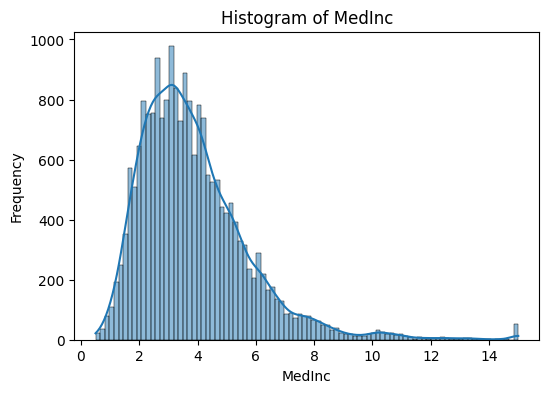

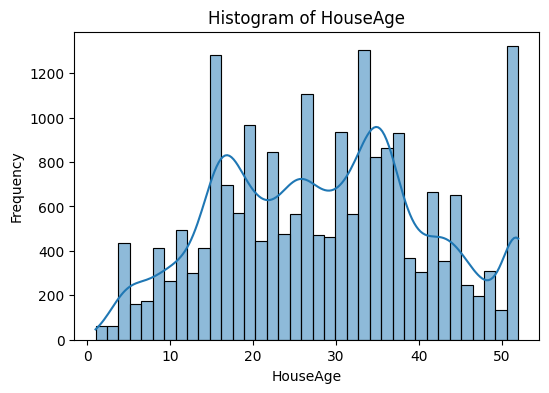

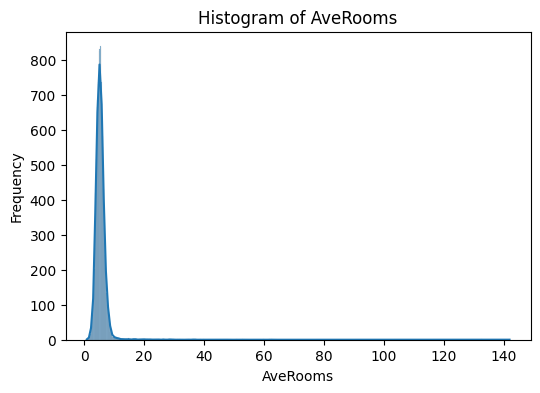

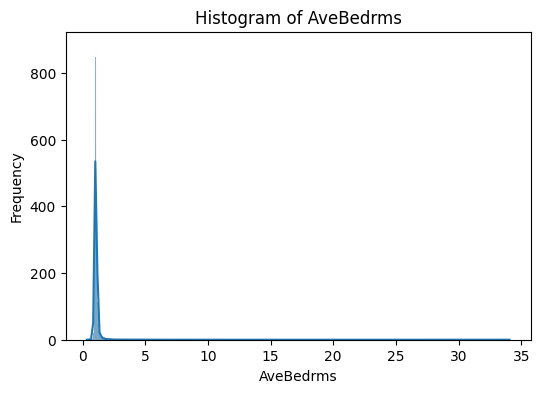

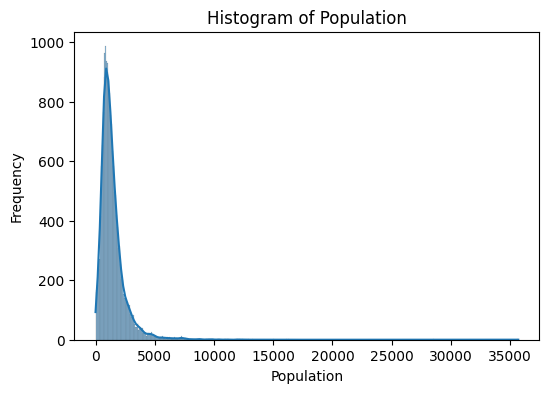

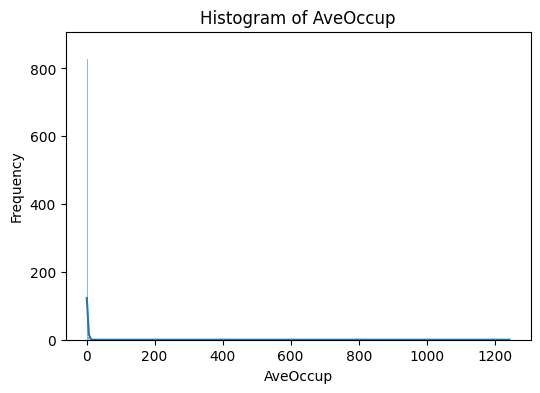

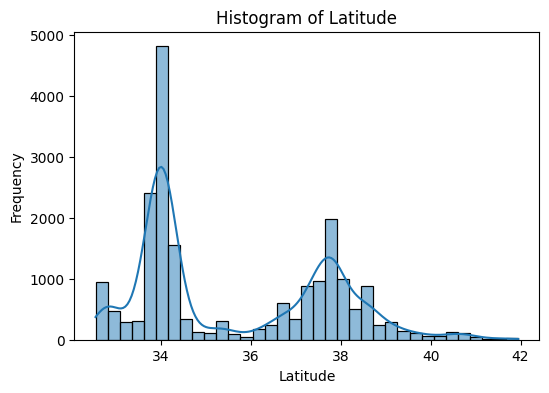

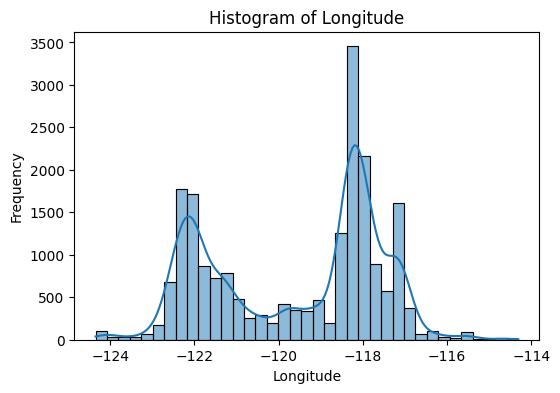

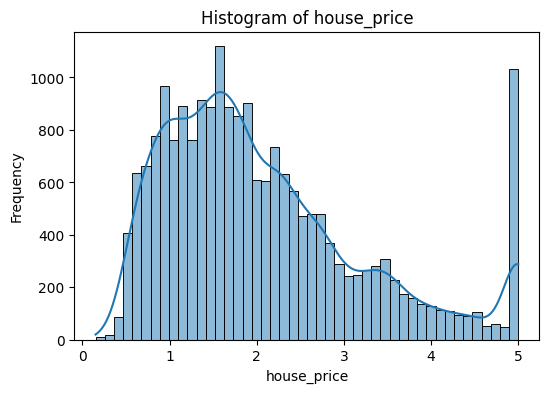

In [ ]:
for feature in df:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

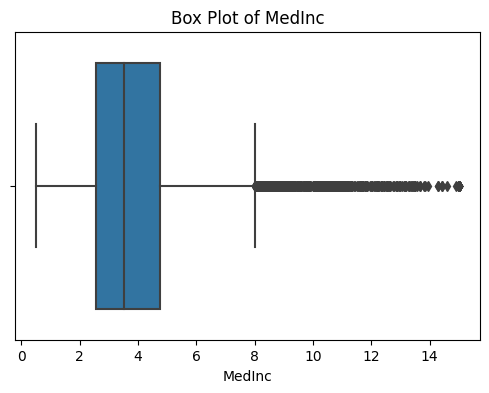

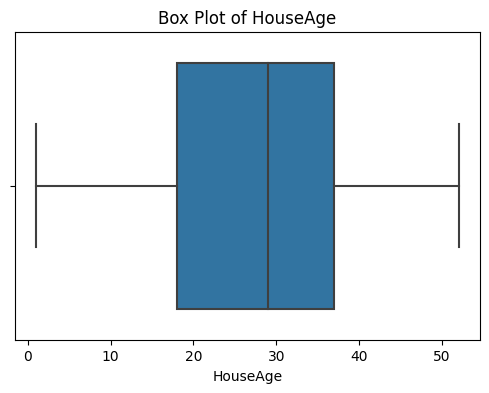

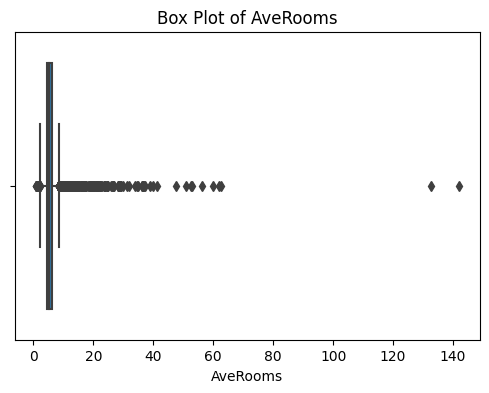

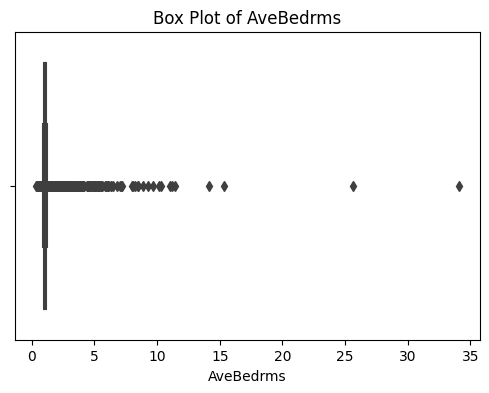

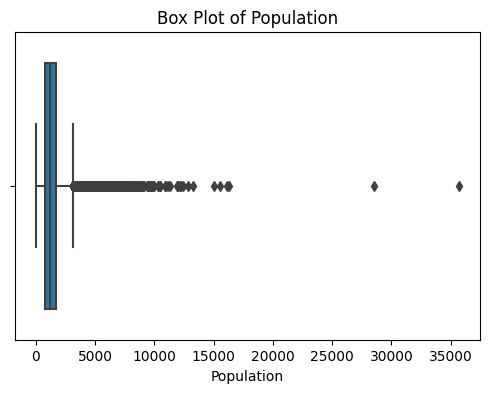

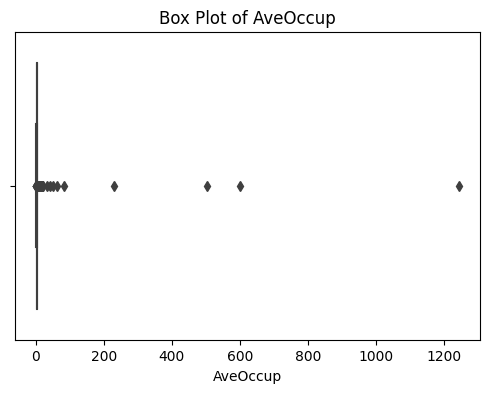

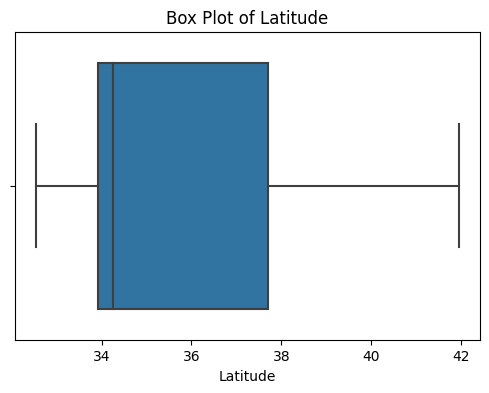

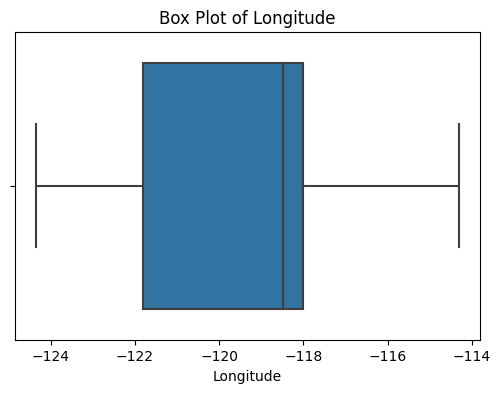

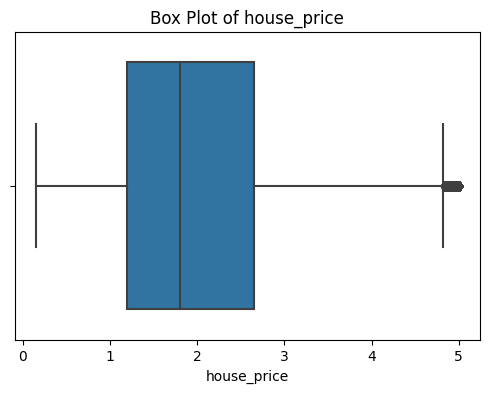

In [ ]:
for feature in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

Pada bagian awal dilakukan pengecekan pada data, didapat informasi seperti tipe data, dan distribusinya, terlihat bahwa pada data california, terdiri dari data numerik saja, lalu pada box plot terlihat nilai outlier pada dataset nya.

#### Feature Engineering

In [ ]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True) #drop latitude dan longtude

In [ ]:
class_counts = df['house_price'].value_counts()

print(class_counts)

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
3.59200      1
0.54900      1
3.77600      1
0.81200      1
0.47000      1
Name: house_price, Length: 3842, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
def drop_duplicates(data):

    print("Before drop duplicated data")
    print(data.shape)

    data = data.drop_duplicates(keep='first')

    print("After drop duplicated data")
    print(data.shape)

    # Check again for duplicated data
    print("Duplicated data:")
    print(data[data.duplicated(keep=False)])

    return data

In [ ]:
train = drop_duplicates(train)
test = drop_duplicates(test)

Before drop duplicated data
(16512, 7)
After drop duplicated data
(16512, 7)
Duplicated data:
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, house_price]
Index: []
Before drop duplicated data
(4128, 7)
After drop duplicated data
(4128, 7)
Duplicated data:
Empty DataFrame
Columns: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, house_price]
Index: []


In [ ]:
def display_isna_values(train, test):

  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_isna_values(train, test)

Missing values in train data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


Missing values in test data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


In [ ]:
def display_null_values(train, test):

  print("Missing values in train data:\n")
  print(train.isna().sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isna().sum())

display_null_values(train, test)

Missing values in train data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


Missing values in test data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


In [ ]:
def display_isin_values(train, test, isin):

  print("Missing values in train data:\n")
  print(train.isin([isin]).sum())
  print("\n")
  print("Missing values in test data:\n")
  print(test.isin([isin]).sum())

display_isin_values(train, test, '?')

Missing values in train data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


Missing values in test data:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
house_price    0
dtype: int64


In [ ]:
df[df['house_price'].isna()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price


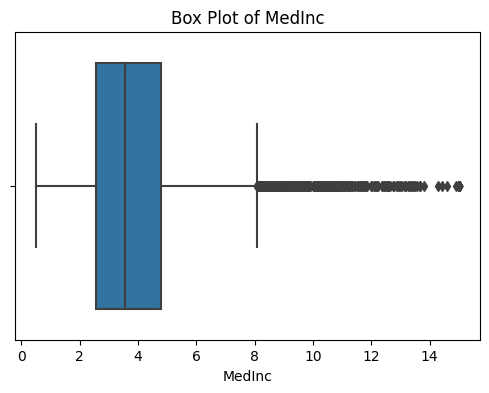

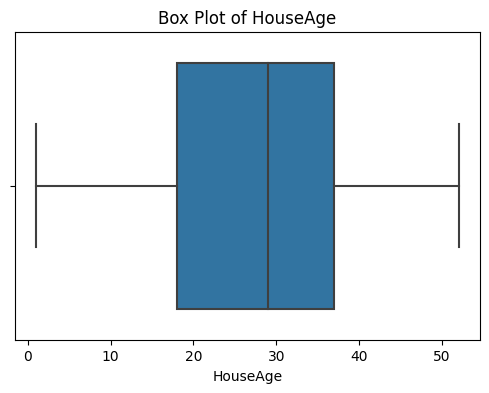

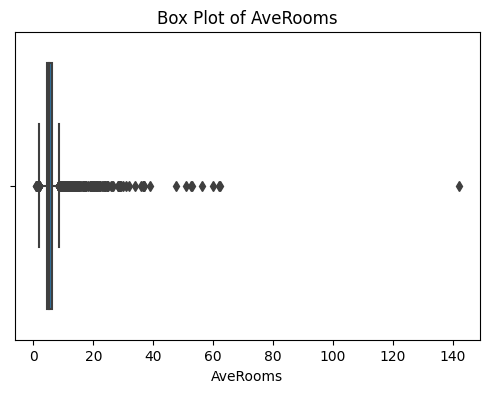

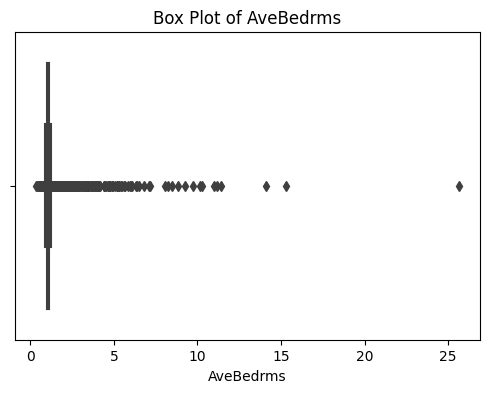

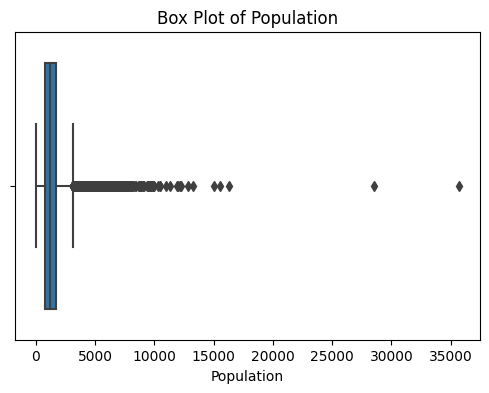

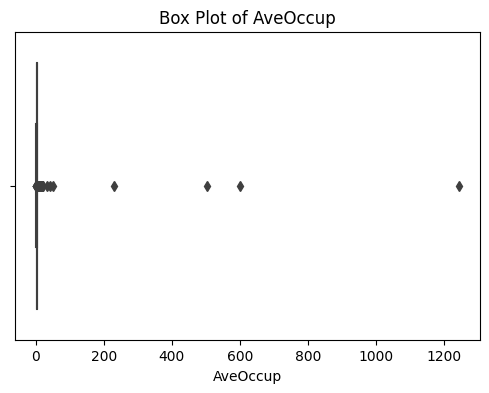

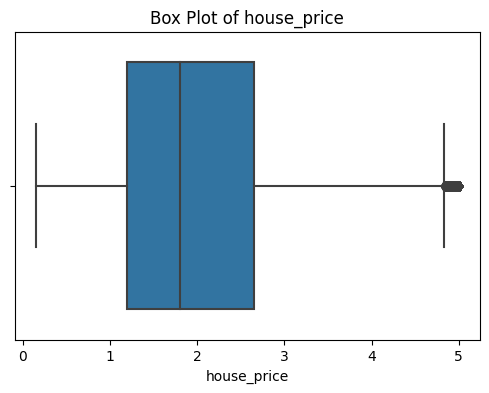

In [ ]:
for feature in train:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)
    plt.show()

In [ ]:
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

def handle_outliers(df, variable, upper_limit, lower_limit):

    df[variable] = np.where(df[variable] > upper_limit, upper_limit,
                            np.where(df[variable] < lower_limit, lower_limit, df[variable]))


In [ ]:
columns = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'house_price']

for col in columns:
  upper_limit, lower_limit = find_outlier_boundary(train, col)
  print(f'Upper and lower limits for {col}: {upper_limit}, {lower_limit}')
  handle_outliers(train, col, upper_limit, lower_limit)
  print(f'Data after handling outliers for {col}:')
  print(train[col].head())

Upper and lower limits for MedInc: 8.0828875, -0.7430125000000003
Data after handling outliers for MedInc:
14196    3.2596
8267     3.8125
17445    4.1563
14265    1.9425
2271     3.5542
Name: MedInc, dtype: float64
Upper and lower limits for AveRooms: 8.474509781463325, 2.0385818023548827
Data after handling outliers for AveRooms:
14196    5.017657
8267     4.473545
17445    5.645833
14265    4.002817
2271     6.268421
Name: AveRooms, dtype: float64
Upper and lower limits for AveBedrms: 1.2411074710635364, 0.8657476648673017
Data after handling outliers for AveBedrms:
14196    1.006421
8267     1.041005
17445    0.985119
14265    1.033803
2271     1.134211
Name: AveBedrms, dtype: float64
Upper and lower limits for Population: 3131.5, -616.5
Data after handling outliers for Population:
14196    2300.0
8267     1314.0
17445     915.0
14265    1418.0
2271      874.0
Name: Population, dtype: float64
Upper and lower limits for AveOccup: 4.556801637852593, 1.1519972702456773
Data after hand

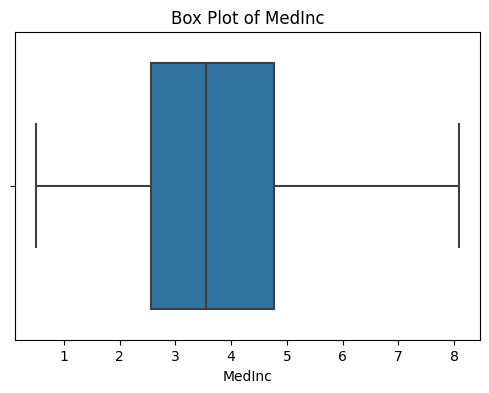

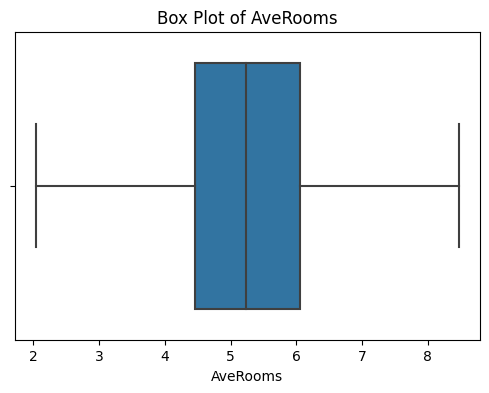

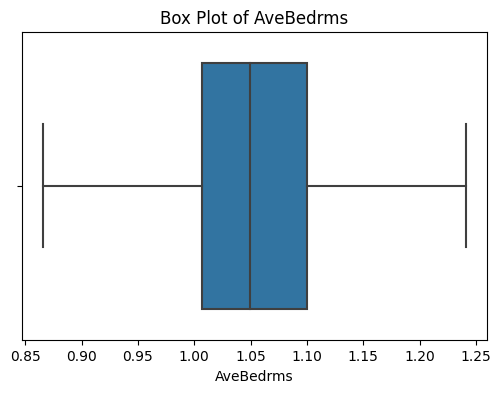

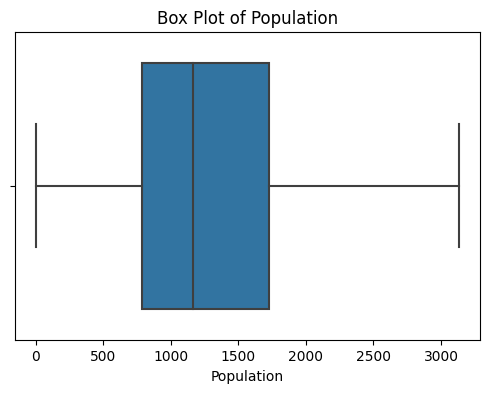

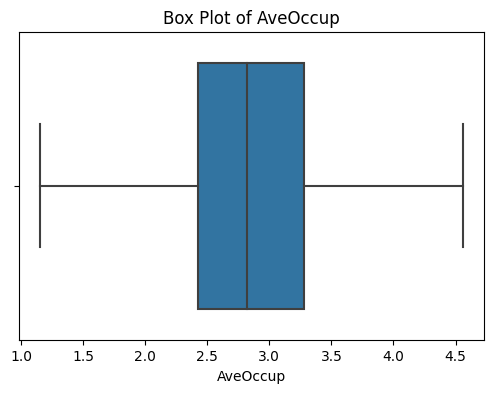

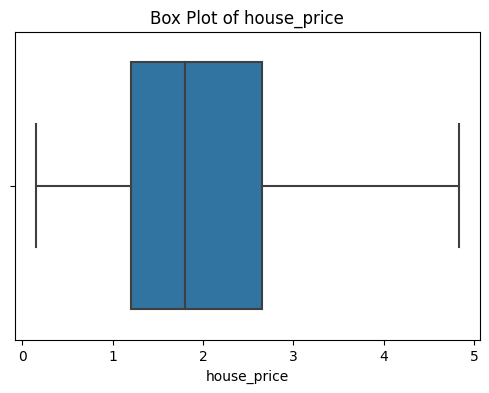

In [ ]:
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

In [ ]:
train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,house_price
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.813223,28.608285,5.313582,1.058587,1337.982831,2.897904,2.063397
std,1.668129,12.602499,1.246658,0.080810,764.909164,0.690652,1.134977
min,0.499900,1.000000,2.038582,0.865748,3.000000,1.151997,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,2.651250
max,8.082888,52.000000,8.474510,1.241107,3131.500000,4.556802,4.831125


In [ ]:
len(train)

16512

In [ ]:
len(test)

4128

In [ ]:
from sklearn.preprocessing import StandardScaler

def scale_features(train, test, target_column):

    scaler = StandardScaler()

    train_features = scaler.fit_transform(train.drop(target_column, axis=1))
    train_scaled = pd.DataFrame(train_features, columns=train.columns[:-1])

    test_features = scaler.transform(test.drop(target_column, axis=1))
    test_scaled = pd.DataFrame(test_features, columns=test.columns[:-1])

    return train_scaled, test_scaled

train_scaled, test_scaled = scale_features(train, test, 'house_price')

In [ ]:
train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,-0.331893,0.348490,-0.237383,-0.645567,1.257726,1.149541
1,-0.000433,1.618118,-0.673852,-0.217580,-0.031355,-1.679346
2,0.205672,-1.952710,0.266522,-0.909173,-0.553001,-0.252943
3,-1.121484,0.586545,-1.051455,-0.306710,0.104613,1.587622
4,-0.155282,1.142008,0.765942,0.935838,-0.606604,-0.865736


In [ ]:
test_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,-1.278131,-0.286324,-0.899538,-0.449255,0.070621,1.418315
1,-0.768503,0.110435,-0.219954,1.669462,0.296799,-0.315812
2,-0.199705,1.856173,-1.072041,1.575218,-0.036584,-2.226328
3,1.153649,-0.921138,0.681887,-0.475021,0.479833,0.791363
4,-0.052889,0.427842,0.143916,-0.378058,-0.359508,-0.599827


In [ ]:
X_train = train_scaled
y_train = train['house_price']
X_test = test_scaled
y_test = test['house_price']

Selanjutnya dilakukan feeature engineering dengan melakukan split data terlebih dahulu, lalu dilakukan pengecekan duplikat dan missing, terlihat bahwa tidak ada data duplikat dan missing pada dataset ini, lalu dilakukan handling outlier dengan metode IQR pada kolom yang memiliki nilai outlier. dan terakhir dilakukan scaling serta split data menjadi x_train, y_train, x_test dan y_test.

### Assignment 2 (poin 10):
buatlah evaluation scoring suatu model untuk kasus regresi (pilih salah satu saja, misal R-Square atau RMSE atau MAE atau MAPE), buatlah learning curve function dan pilih cara evaluation scoring apa yang ingin dicapai

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(regressor, X_train, y_train, X_test, y_test):
    # Evaluasi pada data latih
    y_train_pred = regressor.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    print(f'Training R-Square: {r2_train}')

    # Evaluasi pada data uji
    y_test_pred = regressor.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    print(f'Test R-Square: {r2_test}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv, scoring, title):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Number of Training Samples")
    plt.ylabel("R-squared")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training R-squared")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing R-squared")

    plt.legend(loc="best")
    plt.ylim(0, 1.01)  # Set sumbu y antara 0 dan 1 untuk skor R-squared yang berada dalam rentang tersebut.
    plt.show()

# Contoh penggunaan
# plot_learning_curve(model, X, y, cv=5, scoring="r2", title="Learning Curve with R-squared")


### Assignment 3 A. (Poin 45):
1. lakukan proses Bagging, Boosting, Stacking
2. Bagging menggunakan model Random Forest
3. Boosting bisa menggunakan gradient boosting, XGBoost, Light GBM, CatBoost (pilih salah 1 model saja). Jangan memakai AdaBoost karena sudah digunakan di kelas.
4. Lakukan stacking dengan pemilihan kombinasi model estimator (level 1 model), dan juga 1 model untuk final_estimator (level 2 model)

### Assignment 3 B. (Poin 25) :
1. Lakukan optuna pada Bagging dan Boosting, lalu pilih best parameter model dan re-fit ke data xtrain, ytrain
2. Pilih parameter model yang sesuai dengan model yang digunakan pada Bagging dan Boosting yang dipilih saudara (pilih minimal 3 parameter model)
3. Lakukan evaluasi Model dan learning curve untuk mengecek performa model apakah underfitting, overfitting, atau optimal ?

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
print("Decision Tree Regressor:")
evaluate_model(dt_regressor, X_train, y_train, X_test, y_test)

Decision Tree Regressor:
Training R-Square: 1.0
Test R-Square: 0.3862258017014897


Learning Curve for Decision Tree


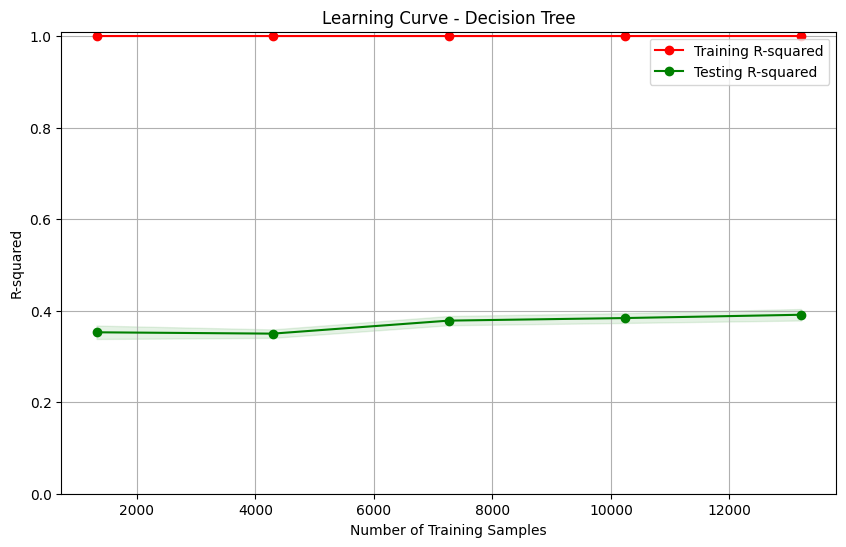

In [ ]:
models = [
    ("Decision Tree", dt_regressor),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

#### Bagging

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
print("Random Forest Regressor:")
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

Random Forest Regressor:
Training R-Square: 0.9563362098524265
Test R-Square: 0.6782288339753482


Learning Curve for Random Forest Regressor


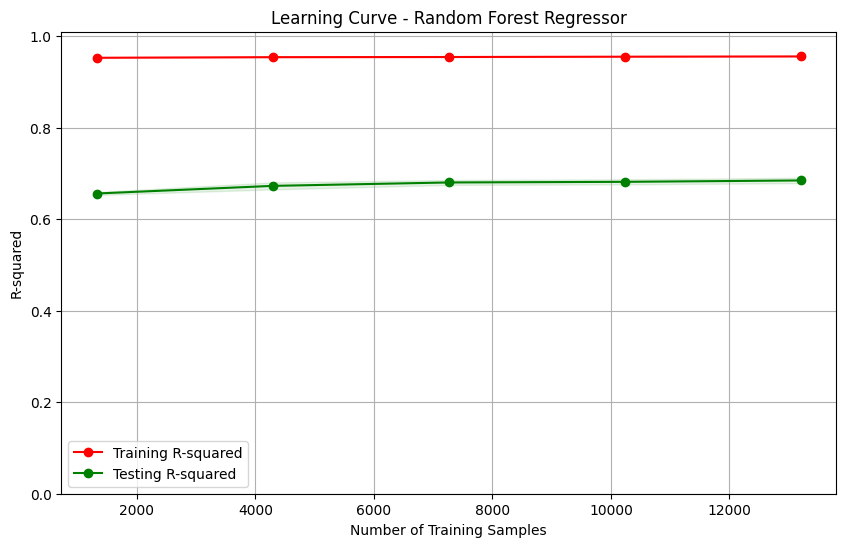

In [ ]:
models = [
    ("Random Forest Regressor", rf_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

In [ ]:
import optuna

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 100)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_float('min_samples_split', 0.1, 1.0)
    min_samples_leaf = trial.suggest_float('min_samples_leaf', 0.1, 0.5)

    rf_model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Set a random state for reproducibility
    )

    rf_model.fit(X_train, y_train)

    y_test_pred = rf_model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)

    return r2

In [ ]:
study = optuna.create_study(direction='maximize')  # maximize R-squared
study.optimize(objective, n_trials=200)

best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"R2 Square: {best_score}")

[I 2023-12-03 02:10:36,763] A new study created in memory with name: no-name-01ca5e69-7fc7-400f-ab7e-41ca19af7d02
[I 2023-12-03 02:10:36,964] Trial 0 finished with value: -7.890210663252795e-05 and parameters: {'n_estimators': 86, 'max_depth': 8, 'min_samples_split': 0.8528086276118754, 'min_samples_leaf': 0.13771393479462485}. Best is trial 0 with value: -7.890210663252795e-05.
[I 2023-12-03 02:10:36,995] Trial 1 finished with value: -5.630526625743926e-05 and parameters: {'n_estimators': 10, 'max_depth': 4, 'min_samples_split': 0.8286609300935736, 'min_samples_leaf': 0.19062551555035043}. Best is trial 1 with value: -5.630526625743926e-05.
[I 2023-12-03 02:10:37,067] Trial 2 finished with value: -6.174730645036597e-05 and parameters: {'n_estimators': 30, 'max_depth': 9, 'min_samples_split': 0.7442945601823355, 'min_samples_leaf': 0.42055032695821415}. Best is trial 1 with value: -5.630526625743926e-05.
[I 2023-12-03 02:10:37,255] Trial 3 finished with value: -7.78087634383251e-05 and

Best Parameters: {'n_estimators': 46, 'max_depth': 10, 'min_samples_split': 0.10056100758168753, 'min_samples_leaf': 0.10009085497971856}
R2 Square: 0.4478372937304489


In [ ]:
final_rf_model = RandomForestRegressor(**best_params)
final_rf_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized Random Forest Regressor:")
evaluate_model(final_rf_model, X_train, y_train, X_test, y_test)

Optimized Random Forest Regressor:
Training R-Square: 0.46563038280686087
Test R-Square: 0.44345250243993495


Learning Curve for Random Forest Regressor After Optuna Tunning


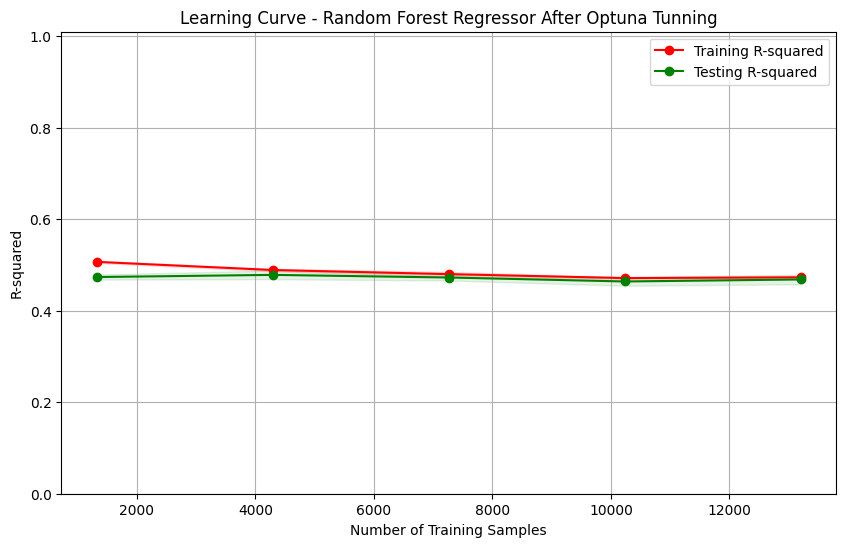

In [ ]:
models = [
    ("Random Forest Regressor After Optuna Tunning", final_rf_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

#### Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

## Evaluasi model untuk setiap algoritma
print("GB Regressor:")
evaluate_model(gbr, X_train, y_train, X_test, y_test)

GB Regressor:
Training R-Square: 0.7117319591779017
Test R-Square: 0.6706556619562538


Learning Curve for GB Regressor


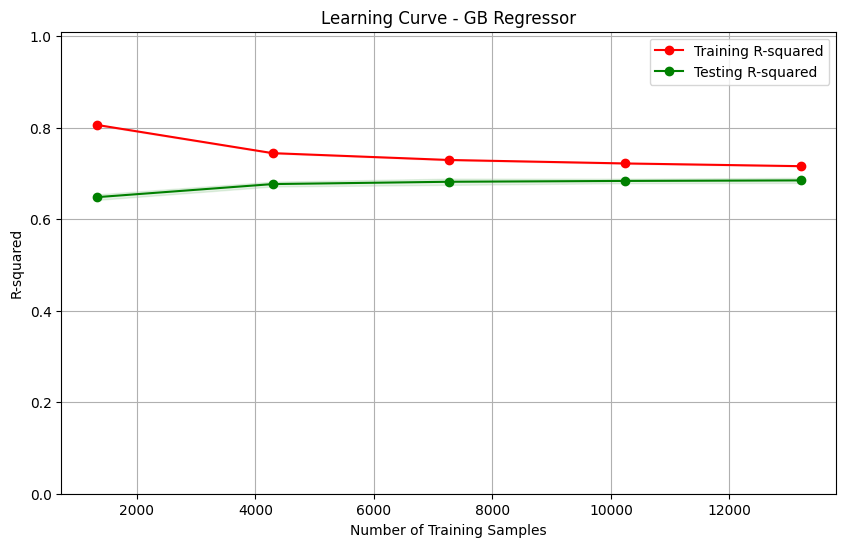

In [ ]:
models = [
    ("GB Regressor", gbr),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

In [ ]:
def gbr_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    gb_model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Set a random state for reproducibility
    )

    gb_model.fit(X_train, y_train)

    y_test_pred = gb_model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)

    return r2  # Optuna will maximize this value

In [ ]:
study = optuna.create_study(direction='maximize')  # maximize R-squared

study.optimize(gbr_objective, n_trials=200)

best_params = study.best_params
best_params

[I 2023-12-02 16:45:03,671] A new study created in memory with name: no-name-ba2e3c57-e6b3-4548-a0b8-349787288bdd
[I 2023-12-02 16:45:09,196] Trial 0 finished with value: 0.6503061030012552 and parameters: {'n_estimators': 89, 'learning_rate': 0.6120604806794521, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.6503061030012552.
[I 2023-12-02 16:45:20,723] Trial 1 finished with value: 0.6088790343245456 and parameters: {'n_estimators': 131, 'learning_rate': 0.5238321907228551, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6503061030012552.
[I 2023-12-02 16:45:21,639] Trial 2 finished with value: 0.6727768646514176 and parameters: {'n_estimators': 14, 'learning_rate': 0.3818809063004447, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.6727768646514176.
[I 2023-12-02 16:45:32,096] Trial 3 finished with value: 0.6488489310903391 and parameters: {'n_est

{'n_estimators': 142,
 'learning_rate': 0.04552026400120958,
 'max_depth': 7,
 'min_samples_split': 4,
 'min_samples_leaf': 4}

In [ ]:
best_params = study.best_params
best_score = study.best_value

print(f"Best Parameters: {best_params}")
print(f"R2 Square: {best_score}")

Best Parameters: {'n_estimators': 142, 'learning_rate': 0.04552026400120958, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 4}
R2 Square: 0.6891643462000476


In [ ]:
final_gbr_model = GradientBoostingRegressor(**best_params)
final_gbr_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized GB Regressor:")
evaluate_model(final_gbr_model, X_train, y_train, X_test, y_test)

Optimized GB Regressor:
Training R-Square: 0.8094916876635132
Test R-Square: 0.6891488889407298


Learning Curve for GB Regressor After Optuna Tunning


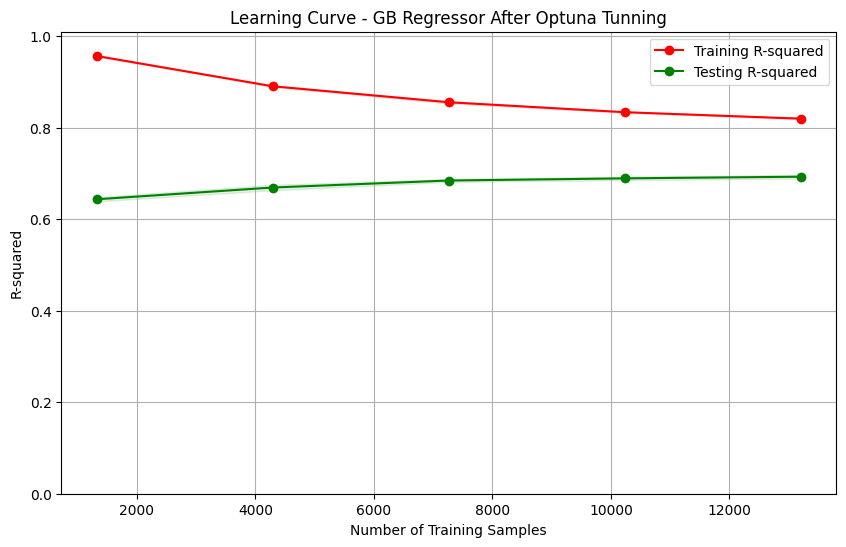

In [ ]:
models = [
    ("GB Regressor After Optuna Tunning", final_gbr_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

#### Stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
# Fungsi untuk melatih dan mengevaluasi model dengan default parameters
def algorithm_pipeline_default(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    return [model, y_pred, score]


# Definisi model regresi untuk dilatih dengan default parameters
models_to_train_reg_default = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

models_preds_scores_reg_default = []

# Melatih dan mengevaluasi model regresi dengan default parameters
for model in models_to_train_reg_default:
    result_reg_default = algorithm_pipeline_default(X_train, X_test, y_train, y_test, model)
    models_preds_scores_reg_default.append(result_reg_default)

# Evaluasi setiap model regresi
for result in models_preds_scores_reg_default:
    model_name = type(result[0]).__name__
    print(f'\nModel: {model_name}')
    evaluate_model(result[0], X_train, y_train, X_test, y_test)


Model: DecisionTreeRegressor
Training R-Square: 1.0
Test R-Square: 0.3801454808409479

Model: RandomForestRegressor
Training R-Square: 0.9562430047859148
Test R-Square: 0.675610909756774

Model: GradientBoostingRegressor
Training R-Square: 0.7117319591779017
Test R-Square: 0.6706949486275349

Model: XGBRegressor
Training R-Square: 0.8670912604724914
Test R-Square: 0.6634691759747567


In [ ]:
#Numerical Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingRegressor

level1 = list()
level1.append(('Random Forest', RandomForestRegressor()))
level1.append(('Extra Trees', ExtraTreesRegressor()))
level1.append(('XGBoost', XGBRegressor()))
level1.append(('GradientBoosting', GradientBoostingRegressor()))

level2 = LinearRegression()

# define the stacking ensemble
model = StackingRegressor(estimators=level1, final_estimator=level2, cv=5)
model.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Random Forest', RandomForestRegressor()),
                              ('AdaBoosting', ExtraTreesRegressor()),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, g...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('GradientBoosting',
                               GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
print("Stacking Regressor:")
evaluate_model(model, X_train, y_train, X_test, y_test)

Stacking Regressor:
Training R-Square: 0.9159132279925689
Test R-Square: 0.6855968762957065


Learning Curve for Stacking Model


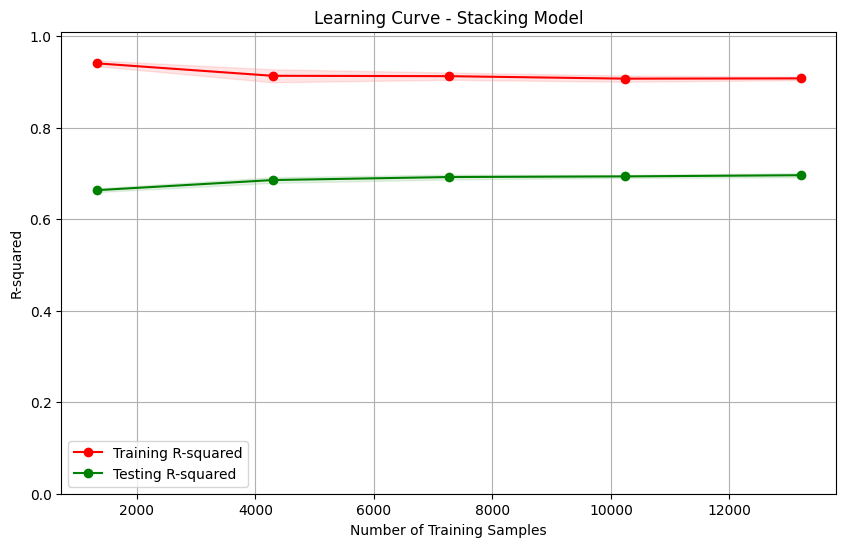

In [ ]:
models = [
    ("Stacking Model", model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

Pada bagian ke tiga dilakukan modeling dengan penggunaan bagging, boosting dan stacking, serta dilakukan tuning ditiap modelnya. hasil menunjukkan bahwa pada metode bagging dengan model random forest, mendapatkan hasil yang masih kurang baik dimana nilai hasil train dan test memiliki rentang yang cukup jauh serta dilihat dari learning curve ada indikasi underfit. selanjutnya pada metode boosting, terlihat adanya peningkatan hasil dimana rentang train dan test yang tidak sejauh sebelumnya namun pada grafik terlihat ada indikasi overfit dimana grafik train yang kian turun.
selanjutnya pada stacking, hampir sama dengan pada bagging dimana nilai train dan test yang gap nya jauh seerta dari learning curvenya.

### Bonus Poin Assignment (20)
1. Lakukan optuna tunning pada Stacking
2. Pilih parameter model yang digunakan pada stacking, pilih minimal 3 parameter model
3. Lakukan evaluasi model menggunakan evaluation score regresi dan learning curve

### Notes : bonus akan ditambahkan jika nilai belum 100, maks nilai ialah 100. Jika ada kelebihan poin, bisa ditambahkan untuk assignment yang belum dikoreksi :)
### bonus poin tambahan : bagi yang mengumpulkan maks H+1 pukul 23.59 WIB setelah hari H pelaksanaan bootcamp akan mendapatkan bonus poin 10

In [ ]:
#Tambahkan cell jika dibutuhkan

In [ ]:
import optuna
from sklearn.metrics import mean_squared_error

def objective(trial):
    # Hyperparameters to optimize
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 100, 200)
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 50)
    et_n_estimators = trial.suggest_int('et_n_estimators', 100, 200)
    et_max_depth = trial.suggest_int('et_max_depth', 10, 50)
    xgb_n_estimators = trial.suggest_int('xgb_n_estimators', 100, 200)
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 10, 50)
    gb_n_estimators = trial.suggest_int('gb_n_estimators', 100, 200)
    gb_max_depth = trial.suggest_int('gb_max_depth', 10, 50)

    level1 = [
        ('Random Forest', RandomForestRegressor(n_estimators=rf_n_estimators, max_depth=rf_max_depth)),
        ('Extra Trees', ExtraTreesRegressor(n_estimators=et_n_estimators, max_depth=et_max_depth)),
        ('XGBoost', XGBRegressor(n_estimators=xgb_n_estimators, max_depth=xgb_max_depth)),
        ('GradientBoosting', GradientBoostingRegressor(n_estimators=gb_n_estimators, max_depth=gb_max_depth))
    ]

    level2 = LinearRegression()

    st_model = StackingRegressor(estimators=level1, final_estimator=level2, cv=5)

    st_model.fit(X_train, y_train)

    y_test_pred = st_model.predict(X_test)

    r2 = r2_score(y_test, y_test_pred)

    return r2

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print the best parameters
print(study.best_params)

[I 2023-12-03 03:14:50,945] A new study created in memory with name: no-name-4cc513b3-c69e-43cf-a0ab-d8fd816503df
[I 2023-12-03 03:19:07,870] Trial 0 finished with value: 0.6792743776745077 and parameters: {'rf_n_estimators': 119, 'rf_max_depth': 44, 'et_n_estimators': 124, 'et_max_depth': 39, 'xgb_n_estimators': 119, 'xgb_max_depth': 31, 'gb_n_estimators': 114, 'gb_max_depth': 35}. Best is trial 0 with value: 0.6792743776745077.
[I 2023-12-03 03:24:52,097] Trial 1 finished with value: 0.6815168373677558 and parameters: {'rf_n_estimators': 195, 'rf_max_depth': 33, 'et_n_estimators': 157, 'et_max_depth': 15, 'xgb_n_estimators': 119, 'xgb_max_depth': 20, 'gb_n_estimators': 194, 'gb_max_depth': 31}. Best is trial 1 with value: 0.6815168373677558.
[I 2023-12-03 03:30:57,061] Trial 2 finished with value: 0.6809715019299991 and parameters: {'rf_n_estimators': 180, 'rf_max_depth': 42, 'et_n_estimators': 137, 'et_max_depth': 46, 'xgb_n_estimators': 107, 'xgb_max_depth': 35, 'gb_n_estimators': 

{'rf_n_estimators': 195, 'rf_max_depth': 33, 'et_n_estimators': 157, 'et_max_depth': 15, 'xgb_n_estimators': 119, 'xgb_max_depth': 20, 'gb_n_estimators': 194, 'gb_max_depth': 31}


In [ ]:
best_params = {
    'rf': RandomForestRegressor(n_estimators=195, max_depth=33),
    'et': ExtraTreesRegressor(n_estimators=157, max_depth=15),
    'xgb': XGBRegressor(n_estimators=119, max_depth=20),
    'gb': GradientBoostingRegressor(n_estimators=194, max_depth=31)
}

estimators = [(name, model) for name, model in best_params.items()]

final_st_model = StackingRegressor(estimators=estimators, final_estimator=level2, cv=5)
final_st_model.fit(X_train, y_train)

# Evaluate the final model
print("Optimized ST Regressor:")
evaluate_model(final_st_model, X_train, y_train, X_test, y_test)

Optimized ST Regressor:
Training R-Square: 0.9314484801155568
Test R-Square: 0.6830538574085416


Learning Curve for ST Regressor After Optuna Tunning


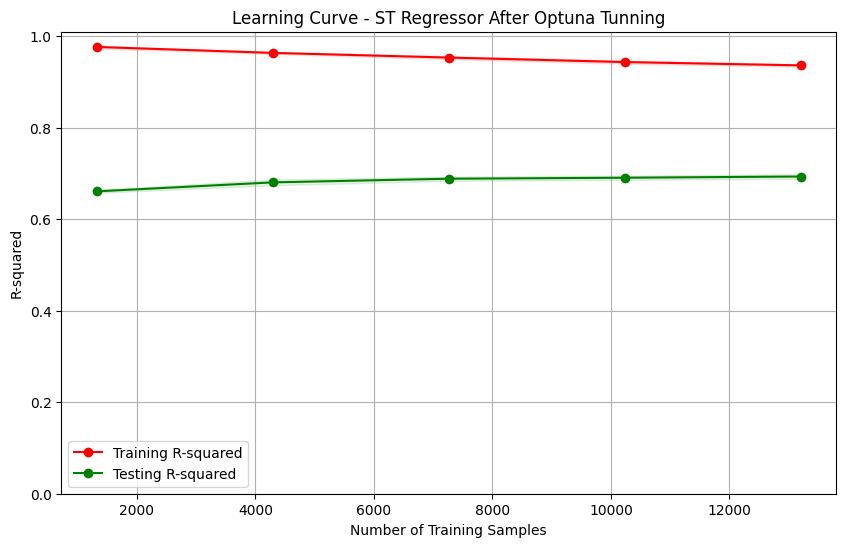

In [ ]:
models = [
    ("ST Regressor After Optuna Tunning", final_st_model),
]

for model_name, model in models:
    print(f"Learning Curve for {model_name}")
    plot_learning_curve(model, X_train, y_train, cv=5, scoring='r2', title=f"Learning Curve - {model_name}")

selanjutnya dicoba melakukan tuning pada metode stacking dengan hanya 10 n trial karena waktu yang lama, didapatkan hasil yang kurang lebih sama dengan sebelum tuning namun dari hasil dengan train mengalami peningkatan.